In [1]:
from datetime import datetime

import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import numpy as np
from scipy.ndimage import gaussian_filter
from shapely.geometry.polygon import LinearRing
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

In [2]:
#dataproj = ccrs.PlateCarree(central_longitude=-160)

def create_map_background():
    dataproj = ccrs.PlateCarree(central_longitude=-160)
    fig= plt.figure(figsize=(64, 20))
    ax = plt.subplot(111, projection=dataproj)
    ax.set_extent([180, -180, -82, 82],ccrs.PlateCarree())
    ax.coastlines('50m', linewidth=1.5)
    ax.add_feature(cfeature.STATES, linewidth=1.0)
    ax.add_feature(cfeature.BORDERS, linewidth=1.0)
    gl = ax.gridlines(color='gray',alpha=0.5,draw_labels=True) 
    gl.xlabels_top, gl.ylabels_right = False, False
    gl.xlabel_style, gl.ylabel_style = {'fontsize': 16}, {'fontsize': 16}
    gl.xlocator = mticker.FixedLocator([380])
    gl.ylocator = mticker.FixedLocator([-90,-80,-60,-40,-20,0, 20, 40, 60, 80, 90])
    gl.xformatter = LongitudeFormatter(zero_direction_label=True)
    gl.yformatter = LatitudeFormatter()
    ax.xaxis.set_major_formatter(gl.xformatter)
    ax.yaxis.set_major_formatter(gl.yformatter)
    ax.stock_img()
    return fig, ax

In [3]:
# import packages
import numpy as np
import xarray as xr
import cartopy.crs as ccrs
# if you get ModuleNotFoundError: No module named 'cartopy', try "conda install cartopy" in terminal
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.gridspec as gridspec
from cartopy.util import add_cyclic_point

In [4]:
globe_07_19_2022 = xr.open_dataset("/Users/cameronmasiello/Desktop/ERA5 Data/ERA5_SSTGlobeAverage_07_19_2022.nc")

In [5]:
globe_07_19_2022

<xarray.Dataset>
Dimensions:    (longitude: 3600, latitude: 1801, time: 1)
Coordinates:
  * longitude  (longitude) float32 -180.0 -179.9 -179.8 ... 179.7 179.8 179.9
  * latitude   (latitude) float32 90.0 89.9 89.8 89.7 ... -89.8 -89.9 -90.0
  * time       (time) datetime64[ns] 2022-07-19
Data variables:
    sst        (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2022-07-25 19:27:55 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [6]:
SSTglobe_07_19_2022 = globe_07_19_2022.sst.mean(dim = 'time') - 273.15

/opt/anaconda3/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1478: UserWarning: The following kwargs were not used by contour: 'linewidth'
  result = matplotlib.axes.Axes.contour(self, *args, **kwargs)


Text(1.0, 1.0, 'Product By: Cameron Masiello')

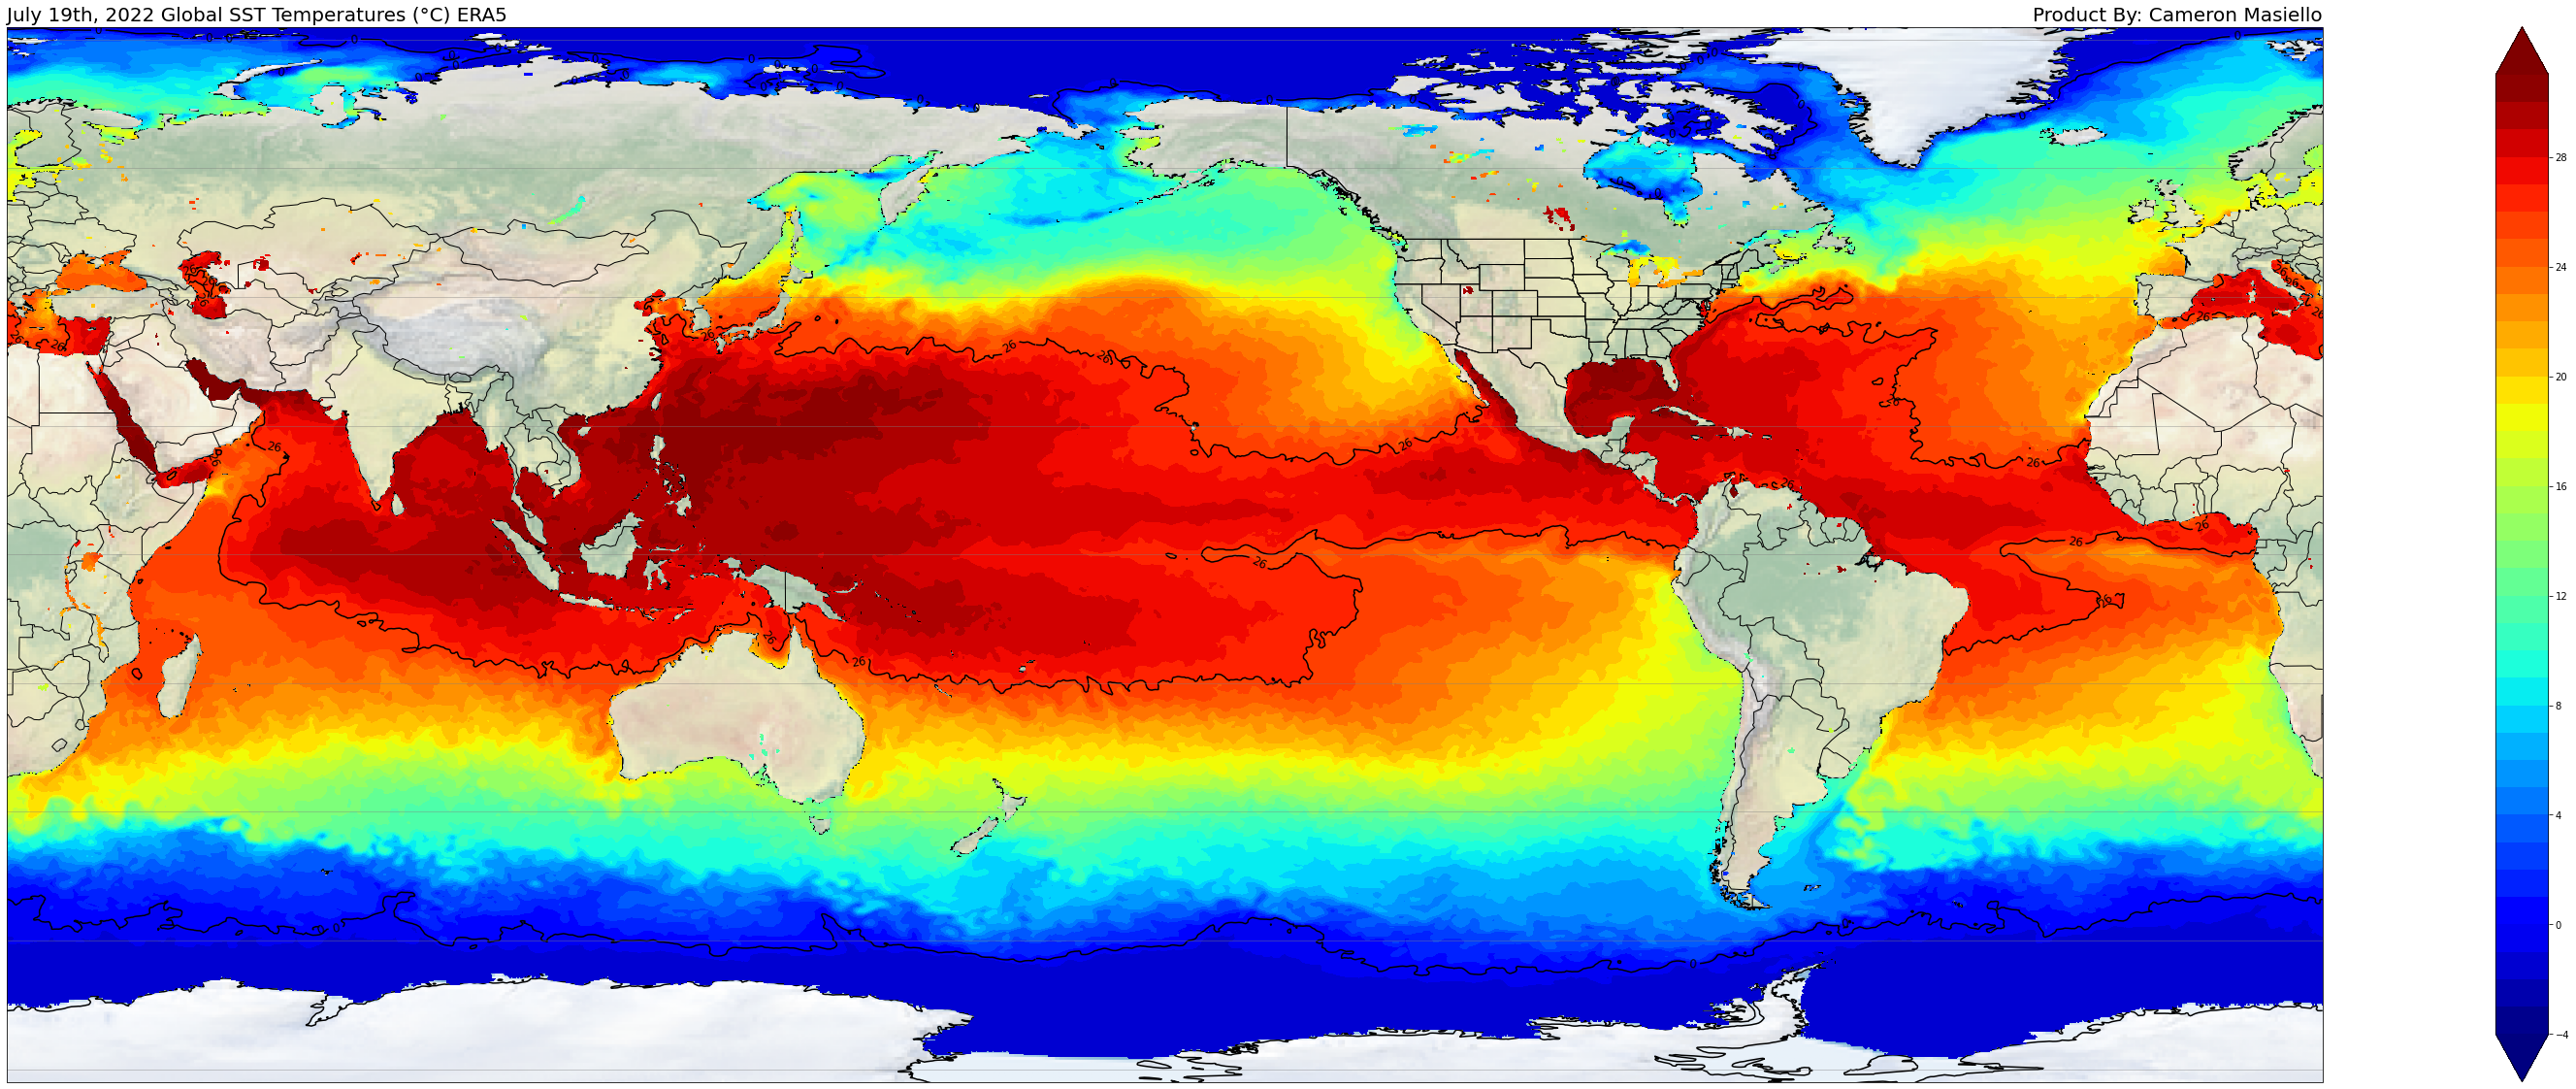

In [8]:
fig, ax = create_map_background()
#SST.plot()
lons_07_19_2022 = SSTglobe_07_19_2022['longitude']
lats_07_19_2022 = SSTglobe_07_19_2022['latitude']

plt.contourf(lons_07_19_2022, lats_07_19_2022, SSTglobe_07_19_2022, origin = 'lower', levels = np.arange(-4, 32, 1), cmap='jet', transform = ccrs.PlateCarree(),
                   extend='both')
plt.colorbar()

contourglobe_07_19_2022 = plt.contour(lons_07_19_2022,lats_07_19_2022,SSTglobe_07_19_2022, np.arange(0,52,26), linestyles = '-', linewidth = 0.2, colors = 'black',transform = ccrs.PlateCarree())
plt.clabel(contourglobe_07_19_2022,fontsize = 12, inline = 1, fmt = '%1.0f')

plt.title('July 19th, 2022 Global SST Temperatures (°C) ERA5', loc='left', fontsize = 20)
plt.title('Product By: Cameron Masiello', loc='right', fontsize = 20)

In [9]:
SST_07_19_Avg_91to20 = xr.open_dataset("/Users/cameronmasiello/Desktop/ERA5 Data/ERA5_SSTGlobeAverage_07_19_Average_91to20.nc")
SST_07_19_2022 = xr.open_dataset("/Users/cameronmasiello/Desktop/ERA5 Data/ERA5_SSTGlobeAverage_07_19_2022.nc")
SSTa_07_19_2022 = (SST_07_19_2022.sst.mean(dim = 'time') - 273.15) - (SST_07_19_Avg_91to20.sst.mean(dim = 'time') - 273.15)


In [11]:
AVG = .197

averageanomaly = (SSTa_07_19_2022.mean(dim = 'latitude')).mean(dim = 'longitude')

print(averageanomaly)


<xarray.DataArray 'sst' ()>
array(0.19707829, dtype=float32)


Text(1.0, 1.0, 'Product By: Cameron Masiello \n Global Average Anomaly = 0.197°C')

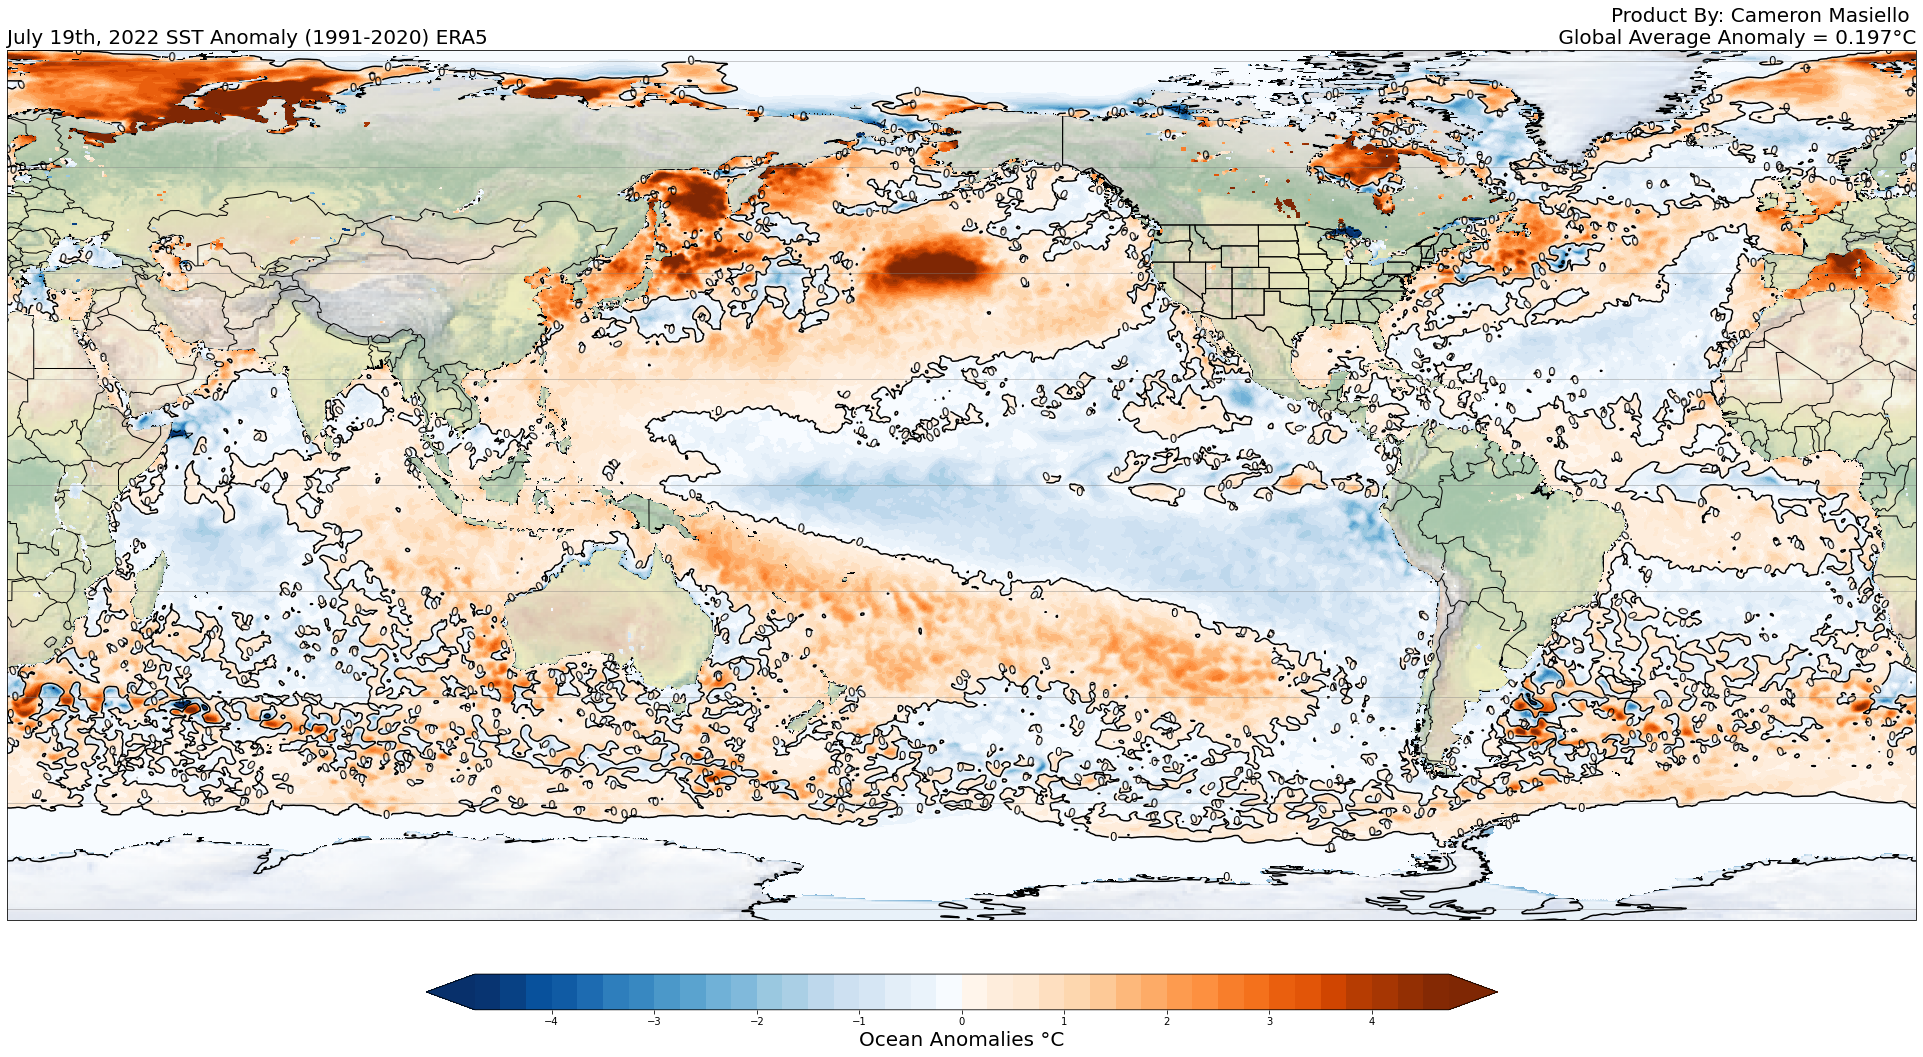

In [16]:
fig, ax = create_map_background()

#SST.plot()
lonsSSTa_07_19_2022 = SSTa_07_19_2022['longitude']
latsSSTa_07_19_2022 = SSTa_07_19_2022['latitude']

#conlevels = np.linspace(0,30.0,101)

bottom = cm.get_cmap('Oranges', 128)
White = [(1, 1, 1, 1)]
middle = White
top = cm.get_cmap('Blues_r', 128)

newcolors = np.vstack((top(np.linspace(0, 1, 50)),
                       middle,
                       bottom(np.linspace(0, 1, 50))))

newcmp = ListedColormap(newcolors, name='OrangeBlue')

css = plt.contourf(lonsSSTa_07_19_2022, latsSSTa_07_19_2022, SSTa_07_19_2022, origin = 'lower', levels = np.arange(-4.75, 5.0, 0.25), cmap=newcmp, transform = ccrs.PlateCarree(),
                   extend='both')
cbar = plt.colorbar(css, orientation='horizontal', pad=0.05, shrink=0.3, aspect=30,
                    extend ='both')
cbar.ax.set_xlabel('Ocean Anomalies °C', fontsize = 20)

contourdifSSTglobeAnomaly = plt.contour(lonsSSTa_07_19_2022,latsSSTa_07_19_2022,SSTa_07_19_2022, np.arange(-4,4,4), linestyles = '-', linewidth = 0.1, colors = 'k',transform = ccrs.PlateCarree())
plt.clabel(contourdifSSTglobeAnomaly,fontsize = 12, inline = 1, fmt = '%1.0f')

plt.title('July 19th, 2022 SST Anomaly (1991-2020) ERA5', loc='left',fontsize = 20)
plt.title(f'Product By: Cameron Masiello \n Global Average Anomaly = {AVG}°C', loc='right',fontsize = 20)

In [17]:
#how to show changes in regards to bias in subtracting global averages
#I believe the best way to go about this is to than greate the same anomaly using 1981-2010 climatology
#then, create two global average plots and subtract them from one another to show how you are leading to bias in the 
#far nothern latitudes.

SST_07_19_Avg_81to10 = xr.open_dataset("/Users/cameronmasiello/Desktop/ERA5 Data/ERA5_SSTGlobeAverage_07_19_Average_81to10.nc")
SSTaold_07_19_2022 = (SST_07_19_2022.sst.mean(dim = 'time') - 273.15) - (SST_07_19_Avg_81to10.sst.mean(dim = 'time') - 273.15)

In [19]:
AVGold = .348

averageanomaly = (SSTaold_07_19_2022.mean(dim = 'latitude')).mean(dim = 'longitude')

print(averageanomaly)


<xarray.DataArray 'sst' ()>
array(0.34789824, dtype=float32)


/opt/anaconda3/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/opt/anaconda3/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/opt/anaconda3/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1478: UserWarning: The following kwargs were not used by contour: 'linewidth'
  result = matplotlib.axes.Axes.contour(self, *args, **kwargs)


Text(1.0, 1.0, 'Product By: Cameron Masiello \n Global Average Anomaly = 0.348°C')

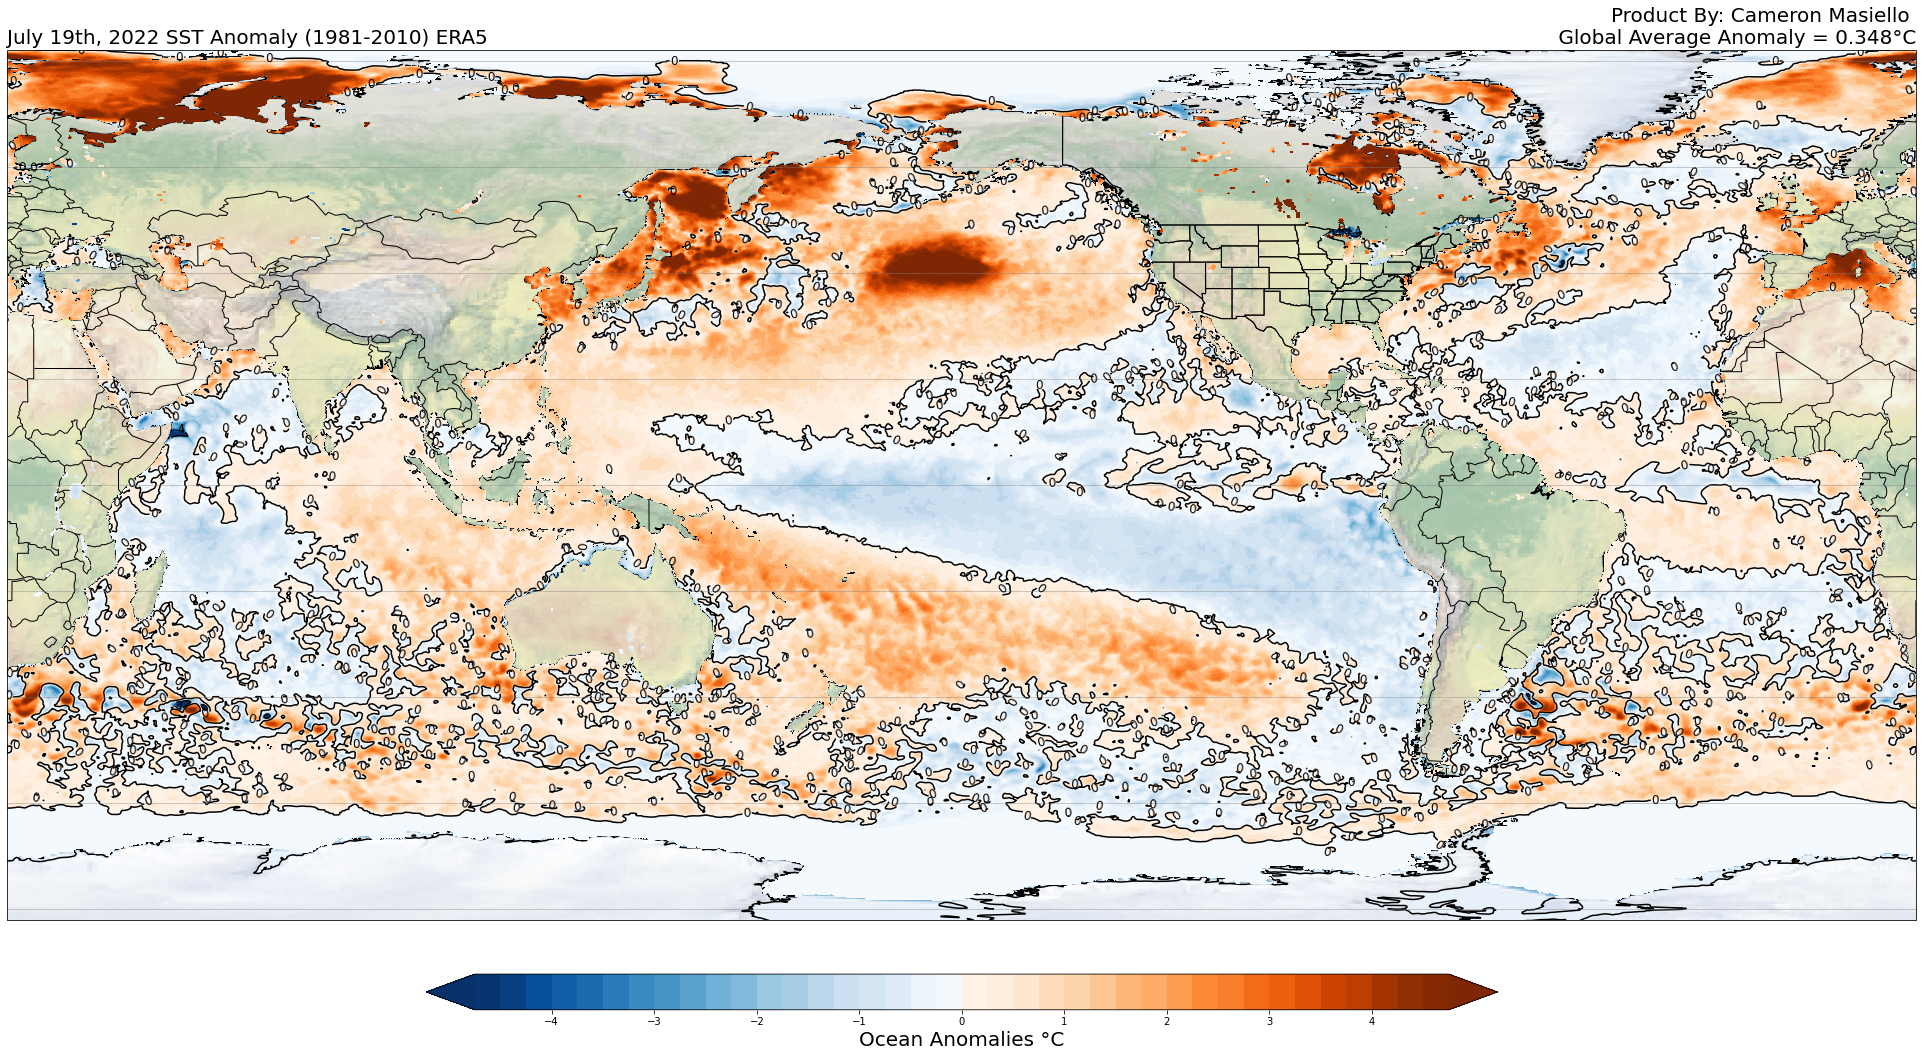

In [20]:
fig, ax = create_map_background()

#SST.plot()
lonsSSTaold_07_19_2022 = SSTaold_07_19_2022['longitude']
latsSSTaold_07_19_2022 = SSTaold_07_19_2022['latitude']

#conlevels = np.linspace(0,30.0,101)

bottom = cm.get_cmap('Oranges', 128)
top = cm.get_cmap('Blues_r', 128)

newcolors = np.vstack((top(np.linspace(0, 1, 50)),
                       bottom(np.linspace(0, 1, 50))))

newcmp = ListedColormap(newcolors, name='OrangeBlue')

css = plt.contourf(lonsSSTaold_07_19_2022, latsSSTaold_07_19_2022, SSTaold_07_19_2022, origin = 'lower', levels = np.arange(-4.75, 5.0, 0.25), cmap=newcmp, transform = ccrs.PlateCarree(),
                   extend='both')
cbar = plt.colorbar(css, orientation='horizontal', pad=0.05, shrink=0.3, aspect=30,
                    extend ='both')
cbar.ax.set_xlabel('Ocean Anomalies °C', fontsize = 20)

contourdifSSTglobeAnomaly = plt.contour(lonsSSTaold_07_19_2022,latsSSTaold_07_19_2022,SSTaold_07_19_2022, np.arange(-4,4,4), linestyles = '-', linewidth = 0.1, colors = 'k',transform = ccrs.PlateCarree())
plt.clabel(contourdifSSTglobeAnomaly,fontsize = 12, inline = 1, fmt = '%1.0f')

plt.title('July 19th, 2022 SST Anomaly (1981-2010) ERA5', loc='left',fontsize = 20)
plt.title(f'Product By: Cameron Masiello \n Global Average Anomaly = {AVGold}°C', loc='right',fontsize = 20)

In [21]:
SSTasubtractingavganomalyold_07_19_2022 = SSTaold_07_19_2022 - AVGold
SSTasubtractingavganomaly_07_19_2022 = SSTa_07_19_2022 - AVG

In [22]:
Diff = SSTasubtractingavganomaly_07_19_2022 - SSTasubtractingavganomalyold_07_19_2022

Text(1.0, 1.0, 'Product By: Cameron Masiello')

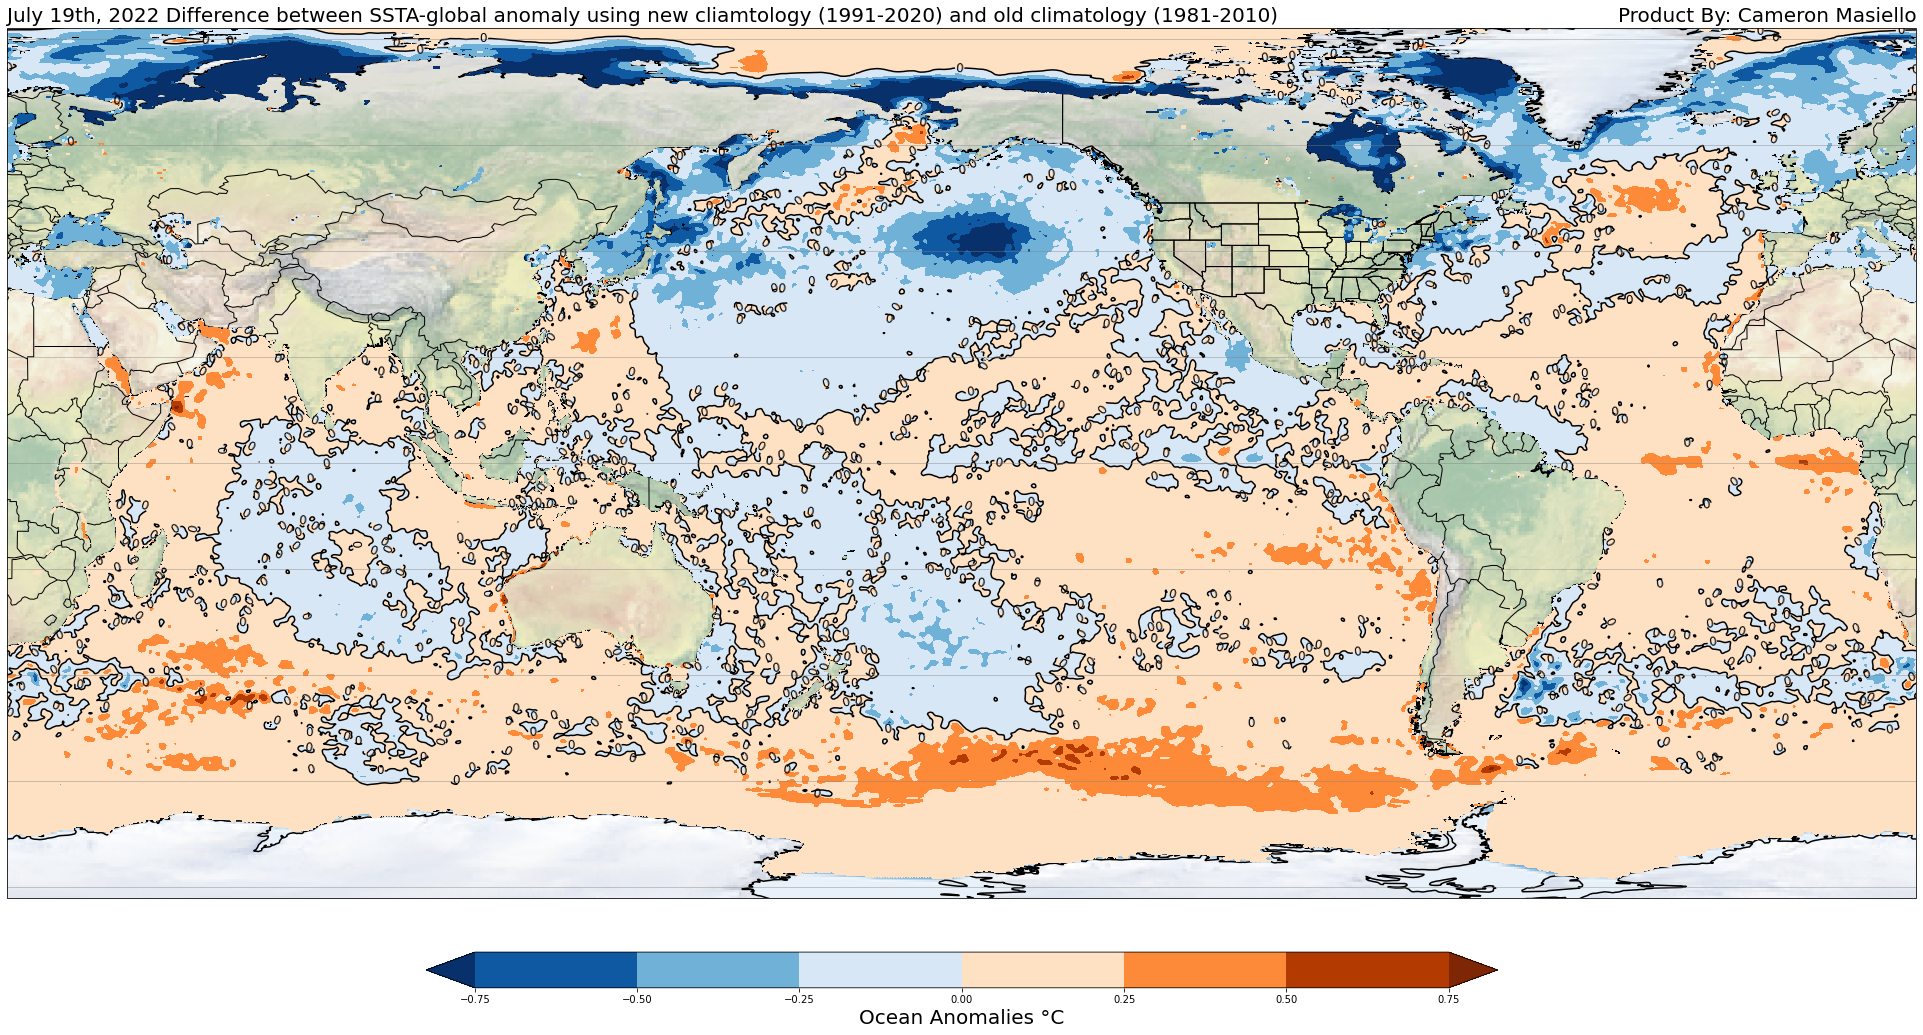

In [26]:
fig, ax = create_map_background()

#SST.plot()
lonsDiff = Diff['longitude']
latsDiff = Diff['latitude']

css = plt.contourf(lonsDiff, latsDiff, Diff, origin = 'lower', levels = np.arange(-.75, 1.0, 0.25), cmap=newcmp, transform = ccrs.PlateCarree(),
                   extend='both')
cbar = plt.colorbar(css, orientation='horizontal', pad=0.05, shrink=0.3, aspect=30,
                    extend ='both')
cbar.ax.set_xlabel('Ocean Anomalies °C', fontsize = 20)

contourdifSSTglobeAnomaly = plt.contour(lonsDiff,latsDiff,Diff, np.arange(-4,4,4), linestyles = '-', linewidth = 0.1, colors = 'k',transform = ccrs.PlateCarree())
plt.clabel(contourdifSSTglobeAnomaly,fontsize = 12, inline = 1, fmt = '%1.0f')

plt.title('July 19th, 2022: Difference between SSTa - (global average anomaly), Using New Cliamtology (1991-2020) and old climatology (1981-2010)', loc='left',fontsize = 20)
plt.title(f'Product By: Cameron Masiello', loc='right',fontsize = 20)
